<a href="https://colab.research.google.com/github/Danangellotti/Ciencia_de_Datos_UGR_24/blob/main/ej_serie_temporal_bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejemplo ARIMA bitcoin


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
# Configura la URL de la API de CoinGecko para obtener datos del valor del Bitcoin
api_url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart'
params = {
    'vs_currency': 'usd',
    'days': '365',  # Obtener datos para el último año
    'interval': 'daily',
}


In [ ]:
# Realiza la solicitud a la API de CoinGecko
response = requests.get(api_url, params=params)
data = response.json()


In [ ]:
data

In [ ]:
# Crea un DataFrame con los datos
bitcoin_data = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
bitcoin_data['timestamp'] = pd.to_datetime(bitcoin_data['timestamp'], unit='ms')
bitcoin_data.set_index('timestamp', inplace=True)


In [ ]:
bitcoin_data

,price
timestamp,
2023-11-09 00:00:00,35795.080631
2023-11-10 00:00:00,36768.420819
2023-11-11 00:00:00,37344.249001
2023-11-12 00:00:00,37122.722824
2023-11-13 00:00:00,37067.696982
...,...
2024-11-04 00:00:00,68803.506263
2024-11-05 00:00:00,67793.297827
2024-11-06 00:00:00,69335.425531


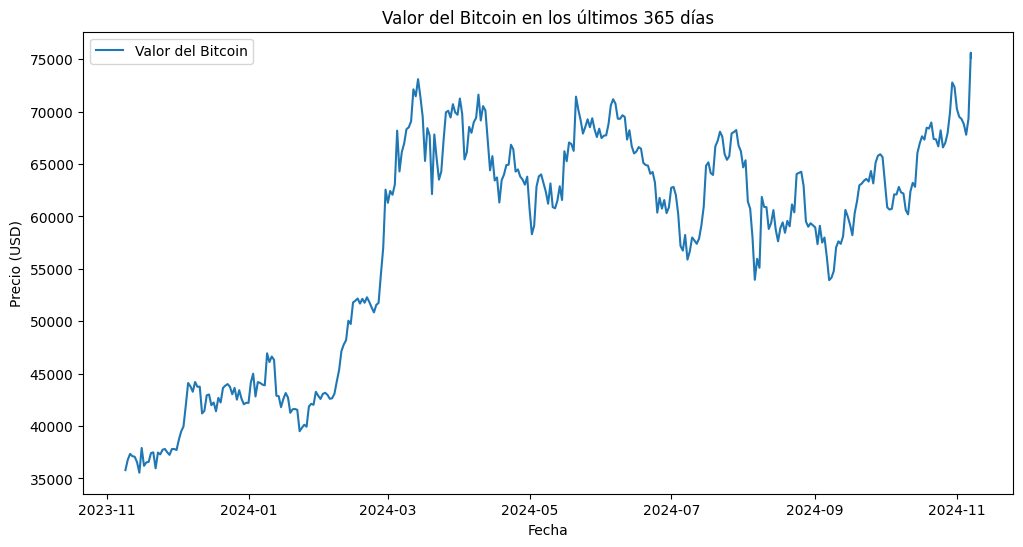

In [ ]:
# Visualiza la serie temporal original
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data['price'], label='Valor del Bitcoin')
plt.title('Valor del Bitcoin en los últimos 365 días')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()


In [ ]:
# Calcular el promedio móvil con una ventana de tamaño 'ventana_promedio'
ventana_promedio = 3
bitcoin_data['Promedio Movil'] = bitcoin_data['price'].rolling(window=ventana_promedio).mean()


In [ ]:
# Calcular la suavización exponencial con un factor de suavización 'alfa'
alfa = 0.2
bitcoin_data['Suavizacion Exponencial'] = bitcoin_data['price'].ewm(alpha=alfa, adjust=False).mean()


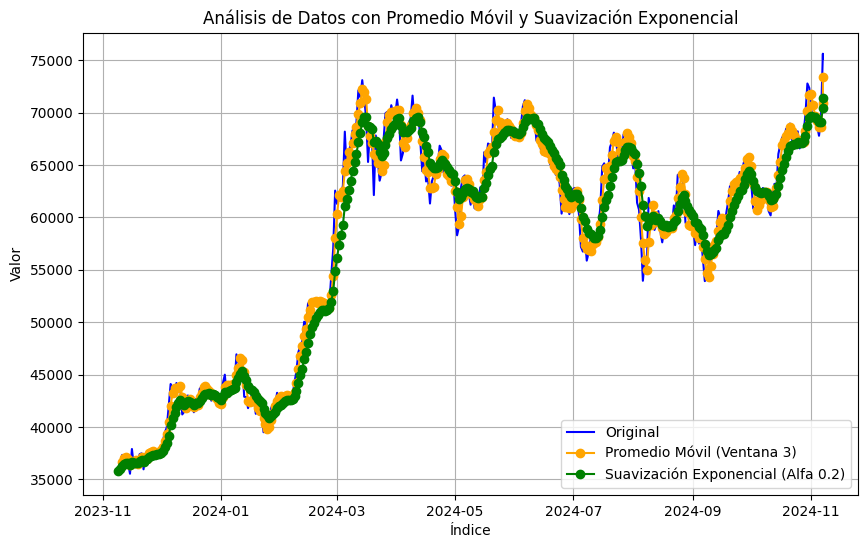

In [ ]:
# Graficar todas las series juntas
plt.figure(figsize=(10, 6))
plt.plot(bitcoin_data['price'], label='Original', linestyle='-',  color='blue')
plt.plot(bitcoin_data['Promedio Movil'], label=f'Promedio Móvil (Ventana {ventana_promedio})', linestyle='-', marker='o', color='orange')
plt.plot(bitcoin_data['Suavizacion Exponencial'], label=f'Suavización Exponencial (Alfa {alfa})', linestyle='-', marker='o', color='green')

plt.title('Análisis de Datos con Promedio Móvil y Suavización Exponencial')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


Analizar los componentes

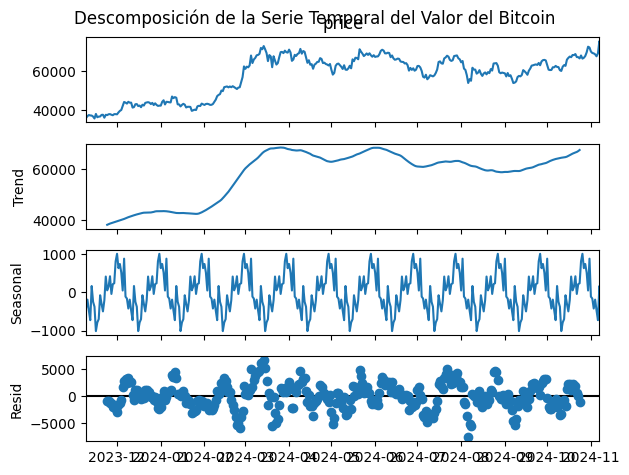

In [ ]:
# Descomposición de la serie temporal para analizar sus componentes
result = seasonal_decompose(bitcoin_data['price'], model='additive', period=30)
result.plot()
plt.suptitle('Descomposición de la Serie Temporal del Valor del Bitcoin')
plt.show()


Prueba de estacionlidad

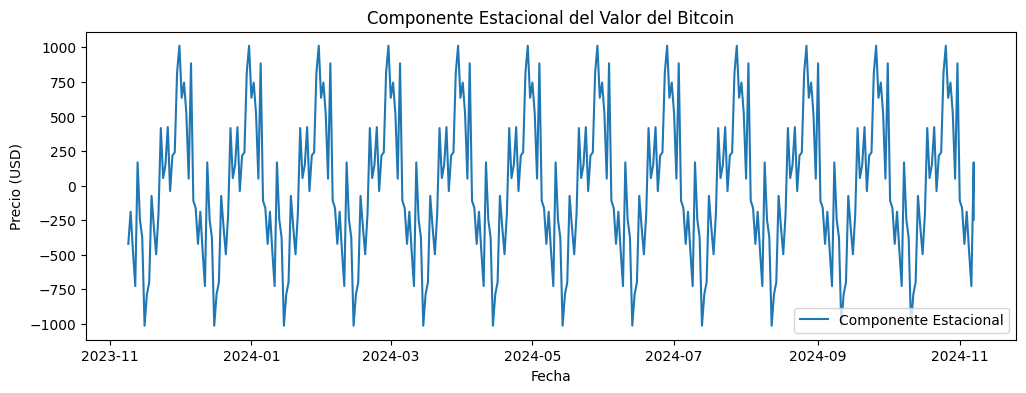

In [ ]:
# Verificación de estacionalidad
seasonal = result.seasonal
plt.figure(figsize=(12, 4))
plt.plot(seasonal.index, seasonal.values, label='Componente Estacional')
plt.title('Componente Estacional del Valor del Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()


In [ ]:
# Verificación de estacionariedad (usando la prueba de Dickey-Fuller)
adf_result = adfuller(bitcoin_data['price'])
print('Estadística ADF:', adf_result[0])
print('P-valor:', adf_result[1])
print('Valores críticos:', adf_result[4])


Estadística ADF: -1.7098394008111484
P-valor: 0.42605018499479064
Valores críticos: {'1%': -3.4483935212959844, '5%': -2.8694912343676497, '10%': -2.571005879151811}


Hipótesis Nula (H0): La hipótesis nula de la prueba es que la serie temporal tiene una raíz unitaria, lo que implica que no es estacionaria.

Estadística de Prueba: La prueba de Dickey-Fuller calcula una estadística de prueba que compara la raíz unitaria con la posibilidad de que no haya raíz unitaria.

P-valor: El resultado de la prueba es un p-valor. Si el p-valor es menor que un umbral (comúnmente 0.05), se rechaza la hipótesis nula, indicando que la serie es estacionaria. Si el p-valor es mayor, no se puede rechazar la hipótesis nula, y se sugiere que la serie no es estacionaria.

Interpretación: Si se rechaza la hipótesis nula, se concluye que la serie temporal es estacionaria. La no estacionariedad puede deberse a la presencia de tendencias o patrones que deben abordarse antes de aplicar ciertos modelos de series temporales.



In [ ]:
# Si la serie no es estacionaria, aplica transformación (por ejemplo, diferenciación)
if adf_result[1] > 0.05:
    print('no estacioaria')
    # calcula la: diferencia 1
    bitcoin_data['price_diff'] = bitcoin_data['price'].diff()
else:
    print('estacionaria')
    # mantenemos serie original
    bitcoin_data['price_diff'] = bitcoin_data['price']


no estacioaria


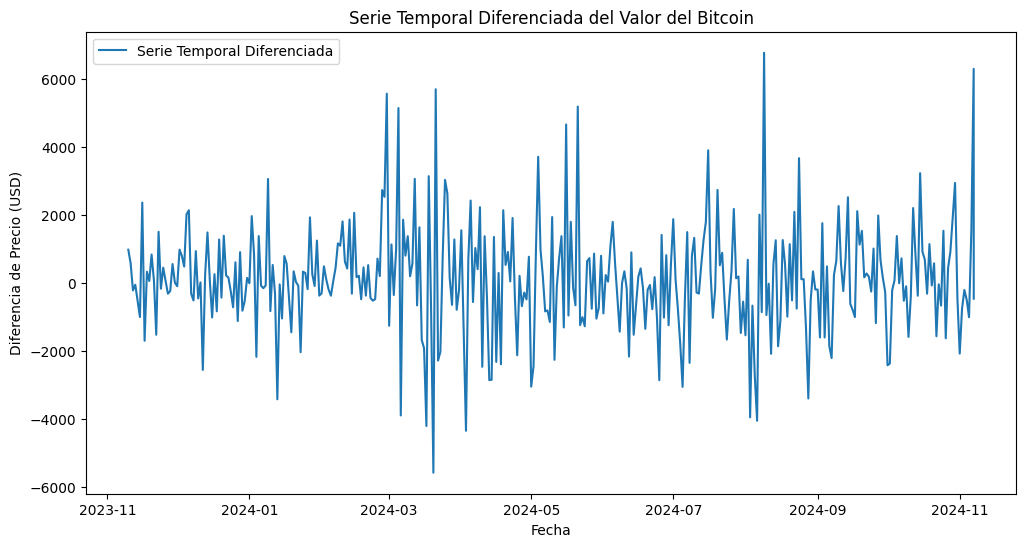

In [ ]:
# Visualiza la serie temporal después de la diferenciación
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data['price_diff'], label='Serie Temporal Diferenciada')
plt.title('Serie Temporal Diferenciada del Valor del Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Diferencia de Precio (USD)')
plt.legend()
plt.show()


In [ ]:
# Verificación de estacionariedad después de la diferenciación
adf_result_diff = adfuller(bitcoin_data['price_diff'].dropna())
print('\nDespués de la diferenciación:')
print('Estadística ADF:', adf_result_diff[0])
print('P-valor:', adf_result_diff[1])
print('Valores críticos:', adf_result_diff[4])



Después de la diferenciación:
Estadística ADF: -20.394942326268982
P-valor: 0.0
Valores críticos: {'1%': -3.4484434475193777, '5%': -2.869513170510808, '10%': -2.571017574266393}


In [ ]:
# Estimación del modelo ARIMA
model = ARIMA(bitcoin_data['price_diff'].dropna(), order=(1, 1, 1))
results = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


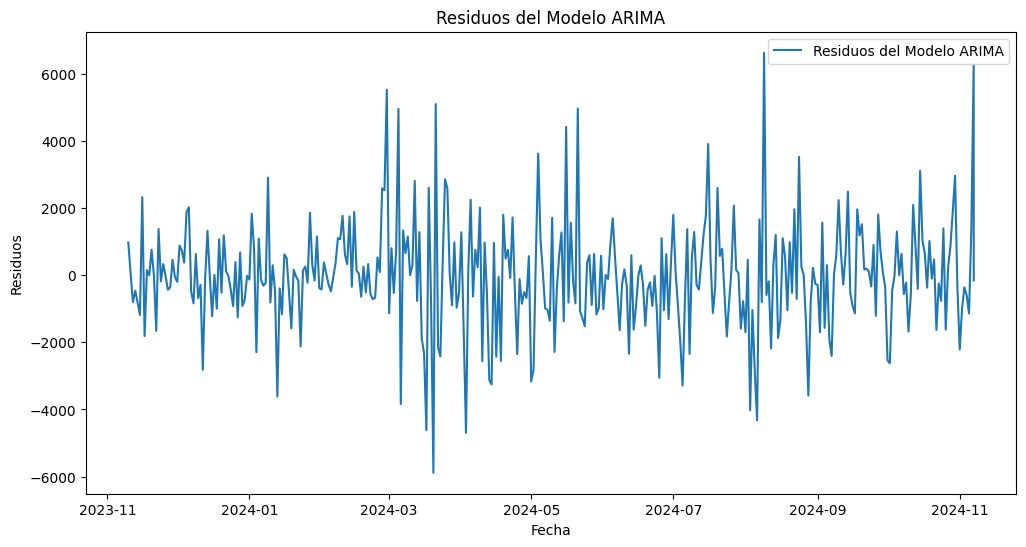

In [ ]:
# Visualiza los residuos del modelo
plt.figure(figsize=(12, 6))
plt.plot(results.resid, label='Residuos del Modelo ARIMA')
plt.title('Residuos del Modelo ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.legend()
plt.show()


In [ ]:
# Predicción con el modelo ARIMA
forecast_steps = 30  # Número de pasos a predecir
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=bitcoin_data.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='D')
forecast_values = forecast.predicted_mean.values


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Invierte la diferencia para obtener predicciones en la escala original
forecast_values = bitcoin_data['price'].iloc[-1] + forecast_values.cumsum()


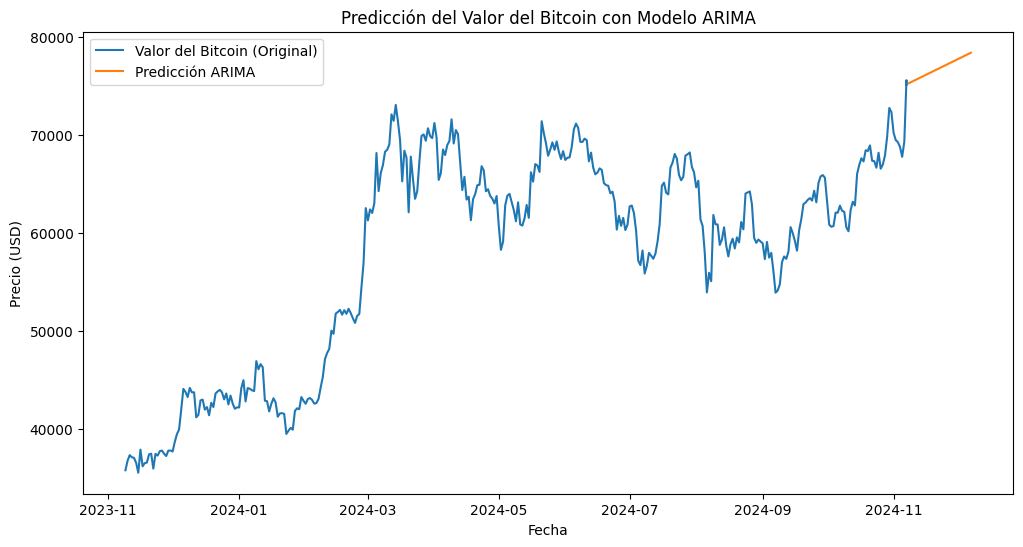

In [ ]:
# Visualiza la serie temporal original y la predicción
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data['price'], label='Valor del Bitcoin (Original)')
plt.plot(forecast_index, forecast_values, label='Predicción ARIMA')
plt.title('Predicción del Valor del Bitcoin con Modelo ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()

Ahora vamos a utilizar Prophet

In [ ]:
#instalamos prophet y yfinance
!pip install prophet

In [ ]:
#importamos Prophet
from prophet import Prophet

In [ ]:
bitcoin_data

In [ ]:
#redefinimos nombres de columnas como lo requiere Prophet
#data = df.reset_index()[['fecha', 'Close']]
#data.columns = ['ds', 'y']

# Renombrar el índice a 'ds' y la columna 'price' a 'y'
df_prophet = bitcoin_data



In [ ]:
df_prophet

In [ ]:
df_prophet = bitcoin_data.rename(columns={'price': 'y'}).reset_index().rename(columns={'timestamp': 'ds'})



In [ ]:
#instanciemos un modelo
#model = Prophet(**model_params)
model = Prophet()

In [ ]:
df_prophet

In [ ]:
# entrenamos el modelo con los datos
model.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jabfgf6/u3yspzv7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jabfgf6/svhwyhpg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40806', 'data', 'file=/tmp/tmp4jabfgf6/u3yspzv7.json', 'init=/tmp/tmp4jabfgf6/svhwyhpg.json', 'output', 'file=/tmp/tmp4jabfgf6/prophet_modelwzvig7kz/prophet_model-20241107215406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:54:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#definimos un dataframe con las cantidad de dias que queremos predecir
future = model.make_future_dataframe(periods=30, freq='D')


In [ ]:
# predecimos..
forecast = model.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-11-09 00:00:00,36657.829489,32032.981580,41263.661967,36657.829489,36657.829489,-150.684976,-150.684976,-150.684976,-259.902936,-259.902936,-259.902936,109.217960,109.217960,109.217960,0.0,0.0,0.0,36507.144513
1,2023-11-10 00:00:00,36772.811220,31892.190683,41265.710713,36772.811220,36772.811220,-317.060439,-317.060439,-317.060439,-259.902936,-259.902936,-259.902936,-57.157503,-57.157503,-57.157503,0.0,0.0,0.0,36455.750781
2,2023-11-11 00:00:00,36887.792950,31754.145910,41052.901799,36887.792950,36887.792950,-334.776182,-334.776182,-334.776182,-259.902936,-259.902936,-259.902936,-74.873246,-74.873246,-74.873246,0.0,0.0,0.0,36553.016769
3,2023-11-12 00:00:00,37002.774681,32034.414312,40998.320952,37002.774681,37002.774681,-363.800482,-363.800482,-363.800482,-259.902936,-259.902936,-259.902936,-103.897546,-103.897546,-103.897546,0.0,0.0,0.0,36638.974199
4,2023-11-13 00:00:00,37117.756412,32373.269561,41502.151050,37117.756412,37117.756412,-354.784846,-354.784846,-354.784846,-259.902936,-259.902936,-259.902936,-94.881910,-94.881910,-94.881910,0.0,0.0,0.0,36762.971566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2024-12-03 00:39:56,70126.079930,73203.273117,82430.234510,69009.965695,71138.683343,7848.191920,7848.191920,7848.191920,7514.065069,7514.065069,7514.065069,334.126851,334.126851,334.126851,0.0,0.0,0.0,77974.271850
392,2024-12-04 00:39:56,70222.710081,73105.431852,82347.541637,69039.597653,71298.990921,7390.844772,7390.844772,7390.844772,7514.065069,7514.065069,7514.065069,-123.220297,-123.220297,-123.220297,0.0,0.0,0.0,77613.554853
393,2024-12-05 00:39:56,70319.340232,72967.677729,82664.193052,69099.190219,71463.193231,7631.141428,7631.141428,7631.141428,7514.065070,7514.065070,7514.065070,117.076358,117.076358,117.076358,0.0,0.0,0.0,77950.481659
394,2024-12-06 00:39:56,70415.970382,73035.183526,82535.397191,69135.042007,71617.096371,7446.036648,7446.036648,7446.036648,7514.065069,7514.065069,7514.065069,-68.028422,-68.028422,-68.028422,0.0,0.0,0.0,77862.007030


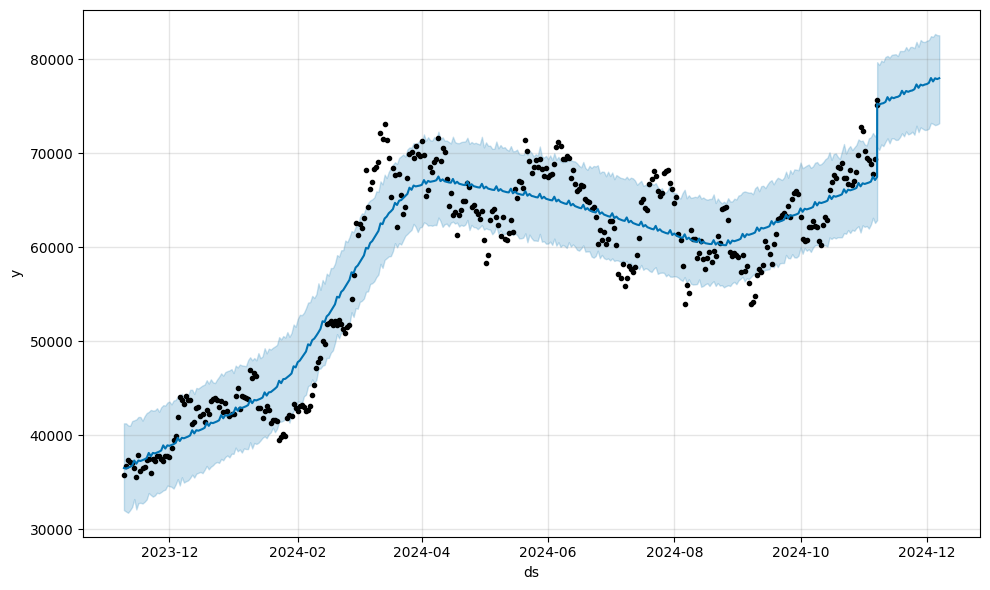

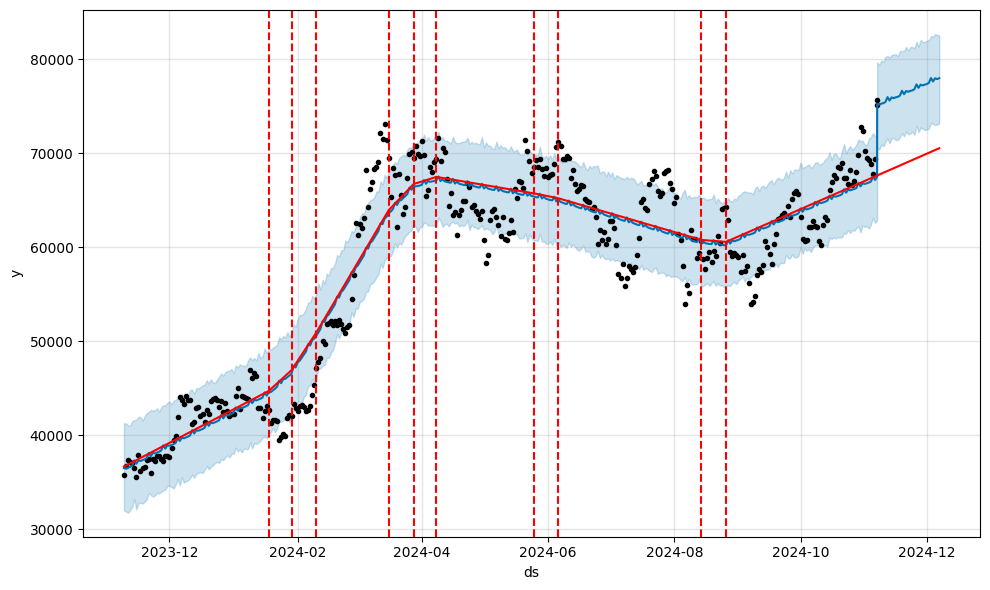

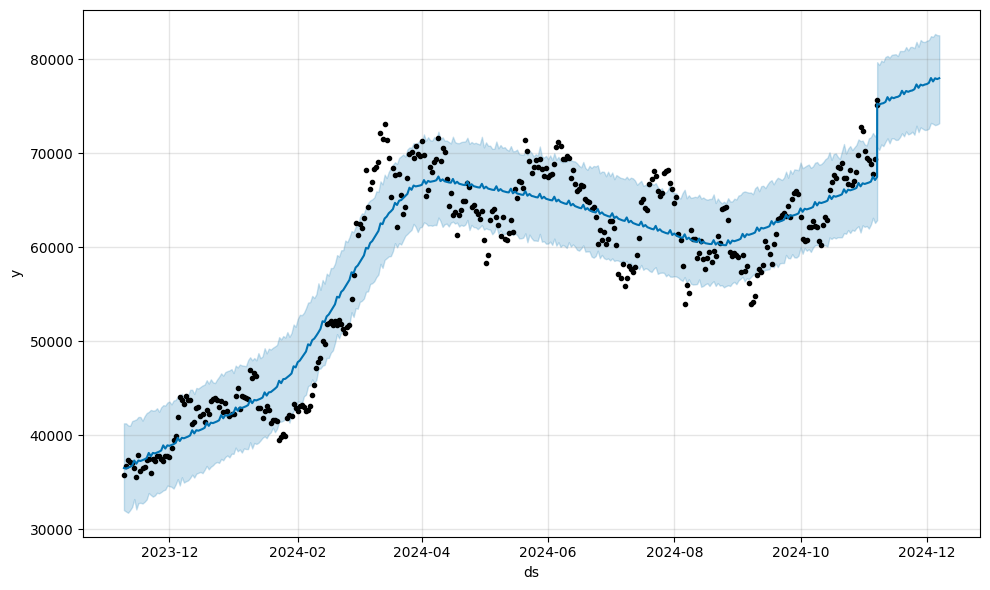

In [ ]:
#graficamos
# agregando puntos de cambio de tendencia
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)
model.plot(forecast)

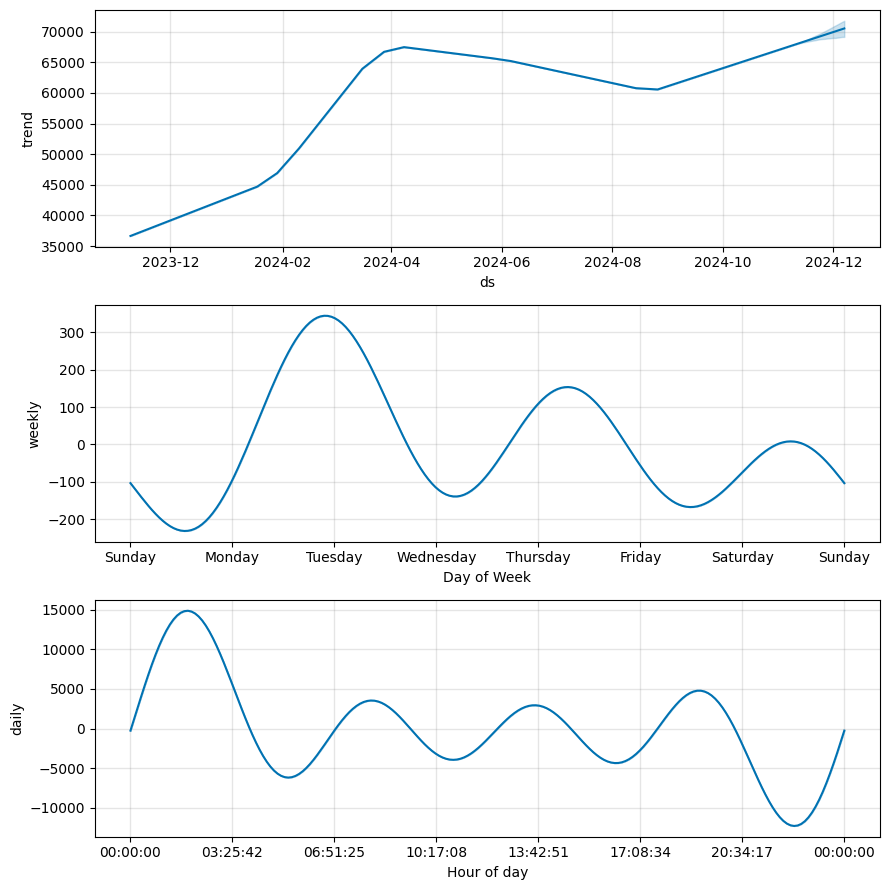

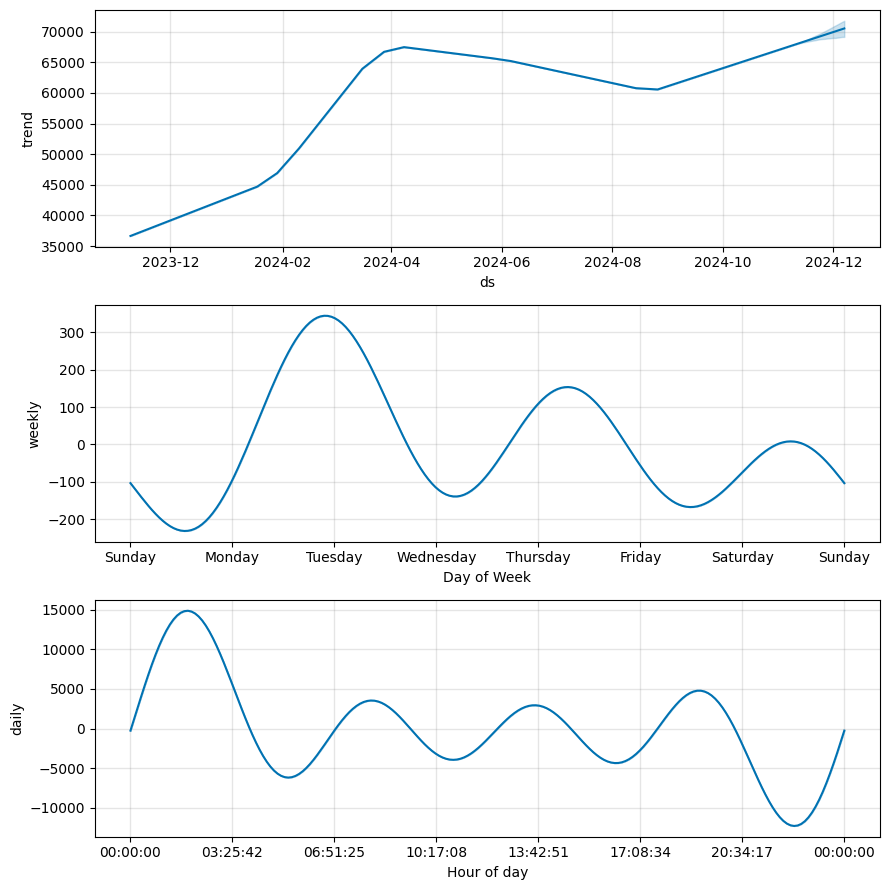

In [ ]:
#graficamos los componentes
model.plot_components(forecast)
